In [11]:
from media_processing_lib.image import image_read, image_resize
from argparse import ArgumentParser
from pathlib import Path
from tqdm import tqdm, trange
import numpy as np
from functools import partial
from multiprocessing import Pool, cpu_count
import shutil
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
dataset_path = Path("neo_1month/data")
# dataset_path = Path("neo_1week/data")


In [13]:
def make_figure_of_date_to_representations(date_to_representations: dict[str, list[str]], representations):
    n_repr = {k: len(v) for k, v in date_to_representations.items()}
    x = np.arange(len(n_repr))

    xticks = [[], []]
    for i, key in enumerate(n_repr.keys()):
        if key[5:7] in ("01", "07") and (len(xticks[1]) == 0 or (len(xticks[1]) > 0 and xticks[1][-1] != key[0:7])):
            xticks[0].append(i)
            xticks[1].append(key[0:7])

    # keys = list(n_repr.keys())
    plt.figure(figsize=(20, 10))
    bar_list = plt.bar(x, n_repr.values(), width=1)
    for bar, bar_n in zip(bar_list, n_repr.values()):
        if bar_n < 5:
            bar.set_color("red")
        elif bar_n < 15:
            bar.set_color("yellow")
        elif bar_n < len(representations):
            bar.set_color("blue")
        else:
            bar.set_color("green")
    plt.xticks(xticks[0], xticks[1], rotation=90)
    plt.ylabel("N representations")
    plt.title(f"Red = <5, Yellow = <15, Blue = <{len(representations)}, Green == {len(representations)}")
    plt.show()

['AOD', 'CHLORA', 'CLD_FR', 'CLD_RD', 'CLD_WP', 'COT', 'FIRE', 'LAI', 'LSTD_AN', 'LSTD', 'LSTN_AN', 'LSTN', 'NO2', 'OZONE', 'SNOWC', 'SST', 'WV', 'NDVI', 'CO_M']


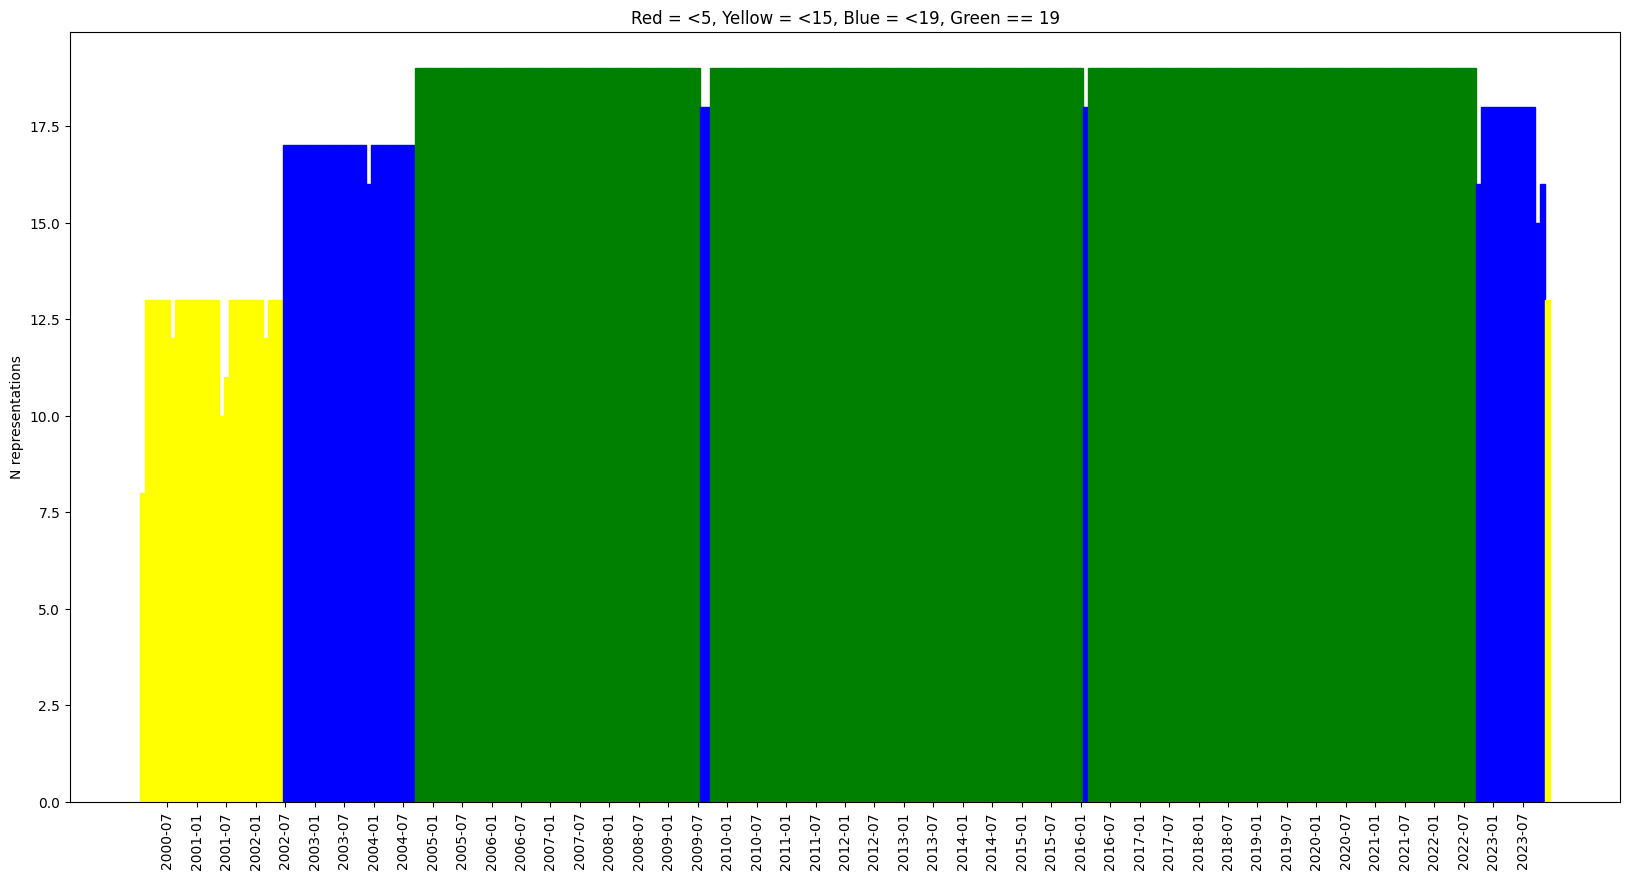

In [14]:
assert dataset_path.exists(), dataset_path
representations = [x.name for x in dataset_path.iterdir() if x.is_dir()]
print(representations)
data = {}
date_to_representations = {}
for representation in representations:
    data[representation] = [f.stem for f in (dataset_path / representation).iterdir() if f.suffix == ".npz"]
    assert len(data[representation]) > 0, f"No files found for representation '{representation}'"
    for item in data[representation]:
        date_to_representations.setdefault(item, []).append(representation)
date_to_representations = {k: v for k, v in sorted(date_to_representations.items(), key=lambda item: item[0])}
make_figure_of_date_to_representations(date_to_representations, representations)

In [15]:
pd.Series({k: len(v) for k, v in date_to_representations.items()}).value_counts()

19    213
17     26
13     25
18     14
16      3
12      2
8       1
10      1
11      1
15      1
Name: count, dtype: int64